# Optimal Portfolio

In [6]:
import pandas as pd
import sys
from finfuncs import *
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Optional:
#update_sp500_data()

In [8]:
tickers, sp500_data = get_sp500_data()
ladj = []
print('Reading data:')

for t in tqdm(sp500_data):
    ladj.append(t['adjclose'])


Reading data:


100%|██████████| 481/481 [00:00<00:00, 13872.19it/s]


In [9]:
df = pd.concat(ladj,axis=1,keys=tickers)

### 1. Cluster de S&P500 tickers with respect to the data of the last 60 days

Reading data:


100%|██████████| 481/481 [00:00<00:00, 9779.54it/s]


<class 'pandas.core.series.Series'> 481 (481,) (481, 2)


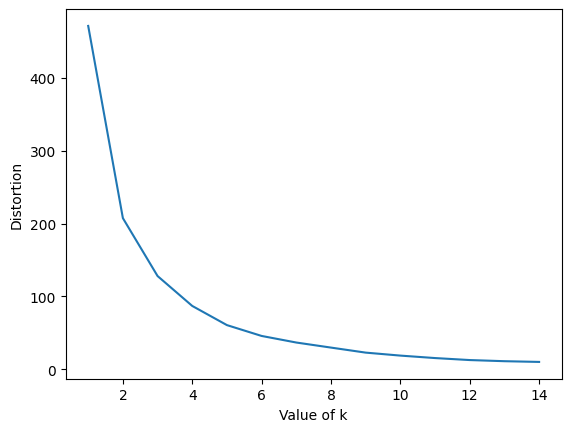

<class 'pandas.core.series.Series'> 481 (481,) (481, 2)


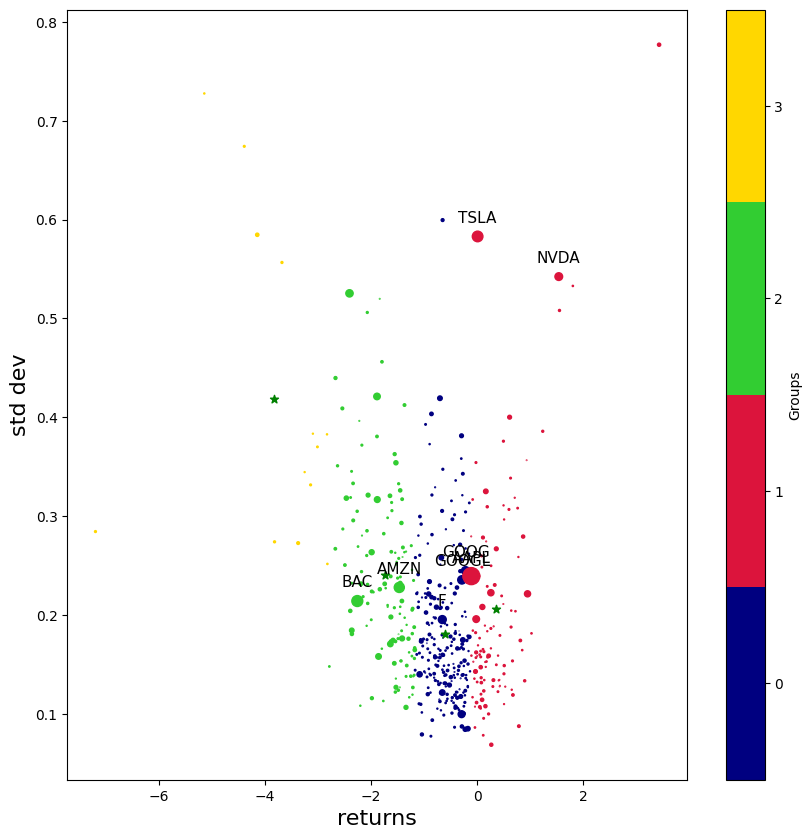

Silhouette:  0.5106979796089869


In [10]:
clustered_df = get_clustered_groups(ndays=10,nk=4)

##### **Obs:**  One of the groups have consistent negative returns, so we will ignore them

Below we see that it corresponds to the first cluster

### We take the first 7 members of the other groups ordered by Sharpe Ratio

In [11]:
ntop = 10
new_tickers = []
for ic in [1]:
    iclus = clustered_df[ic]
    li = list(iclus.sort_values('Sharpe Ratio', ascending=False).head(ntop).index)
    for l in li:
        new_tickers.append(l)

In [12]:
corr, ncomb= get_optimal_portfolio(new_tickers,ndays=10, corr_ratio=0.67, only_corr=True)

corr = corr*1.2
print(ncomb)

Preparing data...


100%|██████████| 481/481 [00:00<00:00, 12119.79it/s]


252
Evaluating correlation of combinations


100%|██████████| 252/252 [00:00<00:00, 302.61it/s]

Number of selected combinations: 72
Minimum correlation:  0.5752163360672086
72


Preparing data...


100%|██████████| 481/481 [00:00<00:00, 7434.02it/s]


252
Evaluating correlation of combinations


100%|██████████| 252/252 [00:00<00:00, 320.50it/s]


Number of selected combinations: 72
Minimum correlation:  0.5752163360672086
Evaluating CLA for each combination


100%|██████████| 72/72 [19:41<00:00, 16.40s/it]


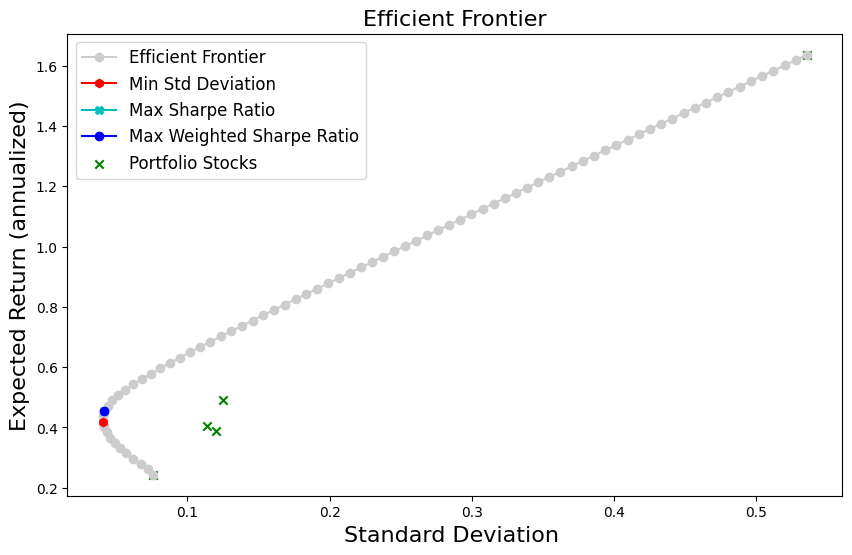

In [13]:
res_portfolio = get_optimal_portfolio(new_tickers,ndays=10, corr_ratio=0.67, only_corr=False)

In [14]:
minRiskReturn = res_portfolio[0][1]['Return']
minRiskWeights = res_portfolio[0][1]['Weights']

res_portfolio[1].columns
maxSharpeReturn = res_portfolio[0][2]['Return']
maxSharpeWeights = res_portfolio[0][2]['Weights']

print ('Analysis resutls:')
print ('Tickers: ', list(res_portfolio[1].columns))
print ('Minimum risk return and weights:', minRiskReturn, minRiskWeights)
print ('Max Sharpe ratio return and weights:', maxSharpeReturn, maxSharpeWeights)

Analysis resutls:
Tickers:  ['AON', 'CBOE', 'DLR', 'LLY', 'MRNA']
Minimum risk return and weights: 0.4193998331559604 [0.20987014 0.34456399 0.18194845 0.21656552 0.04705189]
Max Sharpe ratio return and weights: 0.45468414180735384 [0.21756258 0.29452426 0.19753311 0.22227046 0.0681096 ]


In [15]:
def get_portfolio_stock_components(minRiskWeights, res_portfolio,df, investment=1e5):
    sel_tickers = list(res_portfolio[1].columns)
    prices = []
    for tick in sel_tickers:
        prices.append(df[tick][-1])
    n_actions = []
    
    for i in range(5):
        amount = investment * minRiskWeights[i]
        nac = round(amount/prices[i])
        n_actions.append(nac)
    n_actions
    print ('The advise is to invest:')
    for i in range(5):
        print('%4i actions of %6s'%(n_actions[i], sel_tickers[i]))
    return n_actions

In [16]:
n_actions = get_portfolio_stock_components(minRiskWeights, res_portfolio, df)

The advise is to invest:
  63 actions of    AON
 228 actions of   CBOE
 144 actions of    DLR
  39 actions of    LLY
  42 actions of   MRNA
